In [186]:
library(tidyverse)

In [208]:
data <- read.csv("./data/raw/bitelamina/bitelamina.csv") %>% 

mutate(
    Wiederholung = Wiederholung %>% as.factor() %>% fct_relevel(c("N", "M", "S")),
    Nummer = Nummer %>% as.factor(),
    Tiefe = Tiefe %>% as.factor() %>% fct_rev(),
    Wert = Wert/2 %>% as.numeric()
)

`summarise()` has grouped output by 'Wiederholung'. You can override using the
`.groups` argument.


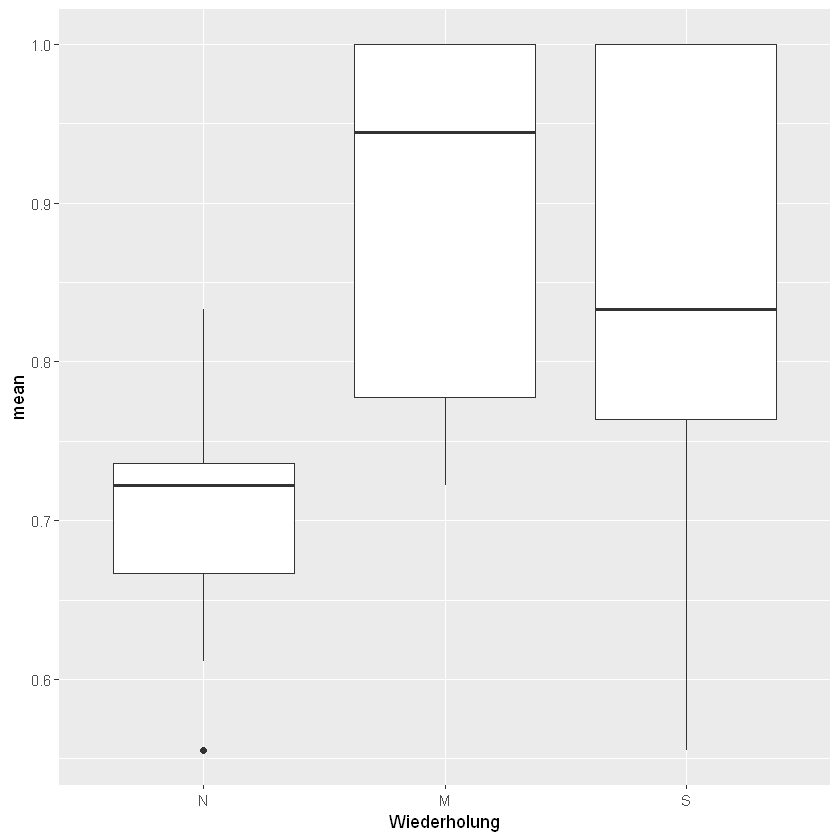

In [209]:
data %>% group_by(Wiederholung, Tiefe) %>% 
summarise(mean = mean(Wert), sd = sd(Wert)) %>%
ggplot(aes(x = Wiederholung, y = mean))+
geom_boxplot()

In [210]:
data %>% group_by(Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert))

Tiefe,mean,sd
<fct>,<dbl>,<dbl>
8,0.7222222,0.4236593
7.5,0.7777778,0.3755338
7,0.7407407,0.3764809
6.5,0.7037037,0.4441773
6,0.7222222,0.3755338
5.5,0.8703704,0.2628466
5,0.8333333,0.3396831
4.5,0.8333333,0.3668997
4,0.7962963,0.3469443


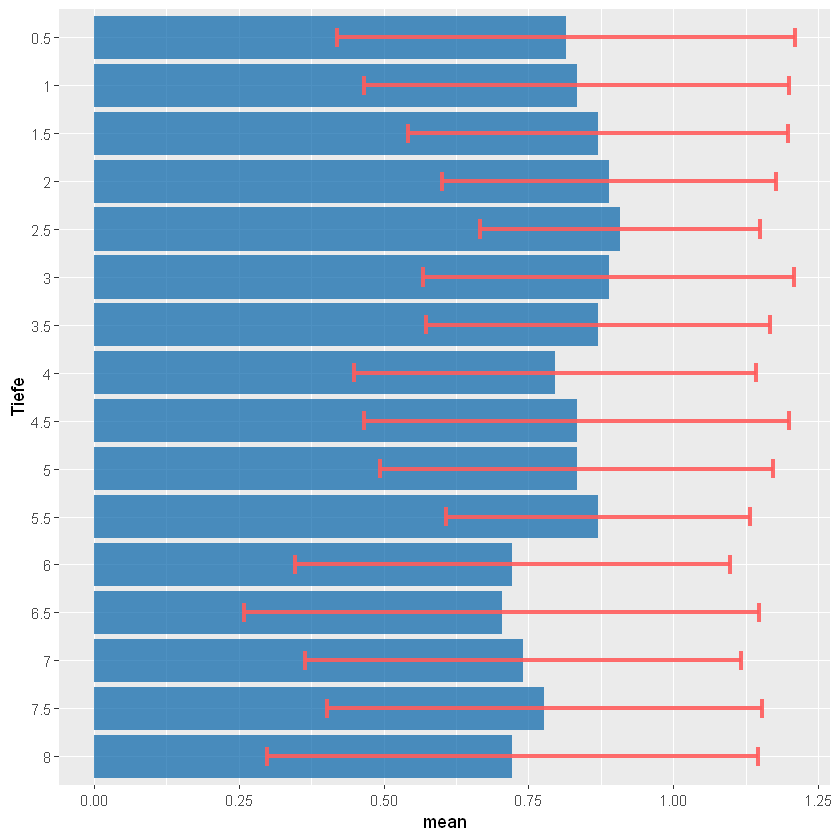

In [213]:
data %>% group_by(Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert)) %>%
ggplot()+
    geom_bar( aes(x=Tiefe, y=mean), stat="identity", fill="#0162a7", alpha=0.7) +
    geom_errorbar( aes(x=Tiefe, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="#ff5c5c", alpha=0.9, size=1.3) +
    coord_flip()